In [1]:
from utils.initialization import *
from utils.arima_utils import *
from utils import pipe_def_arima
from utils.data_utils import *
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from tqdm import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [56]:
fognet = os.getcwd()
conf = build_conf(fognet)

/Users/thorey/Documents/project/competition/fognet/models/bbking/arima
Conf file put in /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_5


In [3]:
data = load_raw_data()
df= build_dataset()

In [4]:
from utils.pipe_def_arima import Pipe
mpipe = Pipe()

# Baseline 

In [57]:
config = parse_conf_file(os.path.join(root,'model_5','conf_model.json'))

In [68]:
import pprint

In [ ]:
model.CV

In [70]:
model.CV_train_rmse

2.3271433689526715

In [69]:
pprint.pprint(parameters_grid)

{'AR': [0, 1, 2, 3, 4, 5, 6],
 'D': [0, 1],
 'MA': [0, 1, 2, 3, 4, 5, 6],
 'Season_AR': [1, 2, 3],
 'Season_D': [0, 1],
 'Season_MA': [1, 2, 3],
 'Season_Period': [1, 12, 24],
 'inputer': ['InterpolateMissingValueInputer',
             'EWMAMissingValueInputer',
             'AutoArimaInputer'],
 'num_features_extra': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'num_lags_regressors': [0, 1, 2, 3, 4, 5, 6, 7],
 'seasonal_inter_lags': [1, 12, 24]}


In [67]:
from utils.arima_utils import *
model = ArimaModel(config=conf,nb_folds=5,num_features_extra=5)
model.train_CV(nb_folds=model.nb_folds)

Loading the prepro pipeline
2
2
Order : 
(0, 1, 1)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints


train summary:
    rmse : 2.327, 0.144
    aic : 11238.860, 4773.028
    bic : 11316.099, 4779.653
    hqic : 11266.676, 4774.729
test summary:
    rmse : 1.808, 1.148
    aic : 318.629, 101.566
    bic : 351.965, 101.566
    hqic : 332.104, 101.566
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_5/nb_folds_5_num_features_extra_5/submissions_20160421_153137.csv


In [63]:
model.pipe

{'pipe_kwargs': {'pipe_0': {'CreateLagArrays__inter_lags': 6,
   'CreateLagArrays__lags': 2,
   'FeatureSelector__features': ['leafwet450_min',
    'leafwet_lwscnt',
    'temp',
    'gusts_ms',
    'leafwet460_min',
    'humidity']}},
 'pipe_list': {'pipe_0': ['FeatureSelector',
   'InterpolateMissingValueInputer',
   'CreateLagArrays',
   'FillRemainingNaN',
   'StandardScaler']}}

In [213]:
config = parse_conf_file(os.path.join(root,'model_16','conf_model.json'))
from utils.arima_utils import *
model = ArimaModel(config)
model.train_CV(nb_fold=model.nb_folds)

Loading the prepro pipeline
2
2
Order : 
(0, 1, 1)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints


train summary:
    rmse : 2.227, 0.152
    aic : 15581.012, 6010.579
    bic : 15637.690, 6015.020
    hqic : 15601.064, 6011.677
test summary:
    rmse : 1.342, 0.957
    aic : 302.455, 99.599
    bic : 325.534, 99.599
    hqic : 311.784, 99.599
Will write output to ~/Documents/project/competition/fognet/models/bbking/arima/model_16/AR_0_MA_1_D_1/submissions_20160421_145614.csv


In [5]:
parameters_grid = {'AR': range(7),
                   'D': [0, 1],
                   'MA': range(7),
                   'Season_AR': [1, 2, 3],
                   'Season_D': [0, 1],
                   'Season_MA': [1, 2, 3],
                   'Season_Period': [1, 12, 24],
                   'num_features_extra': range(10),
                   'inputer': ['InterpolateMissingValueInputer',
                               'EWMAMissingValueInputer',
                               'AutoArimaInputer'],
                   'num_lags_regressors': range(8),
                   'seasonal_inter_lags': [1, 12, 24],
                   }

In [6]:
parameters_grid

{'AR': [0, 1, 2, 3, 4, 5, 6],
 'D': [0, 1],
 'MA': [0, 1, 2, 3, 4, 5, 6],
 'Season_AR': [1, 2, 3],
 'Season_D': [0, 1],
 'Season_MA': [1, 2, 3],
 'Season_Period': [1, 12, 24],
 'inputer': ['InterpolateMissingValueInputer',
  'EWMAMissingValueInputer',
  'AutoArimaInputer'],
 'num_features_extra': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'num_lags_regressors': [0, 1, 2, 3, 4, 5, 6, 7],
 'seasonal_inter_lags': [1, 12, 24]}

In [40]:
def conf_generator(config):

    parameters_grid = config['parameters_grid']
    product = [x for x in apply(itertools.product, parameters_grid.values())]
    conf_runs = [dict(zip(parameters_grid.keys(), p)) for p in product]
    idxs = range(len(conf_runs))
    np.random.shuffle(idxs)
    for idx in idxs:
        yield update_dict(config,conf_runs[idx])
    

def update_dict(config, new_parameters):
    ''' return an update dict based on config
    input:
    config : baseline dict
    new_parameters : new parameter dict
    '''
    d = dict(config)  # Creat new dict, baseline=config
    d.update(new_parameters)  # update the new dict with the new parameters
    return d  # return it ! Trust me , only way to get it done

In [32]:
import random

In [41]:
root = '/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/'
config = parse_conf_file(os.path.join(root,'model_16','conf_model.json'))

In [42]:
import itertools
a = conf_generator(config)

In [43]:
for i,conf in enumerate(a):
    print i,conf['AR'],conf['Season_AR']
    if i >1:
        sys.exit()

0 3 1
1 0 3
2 0 2


NameError: name 'sys' is not defined

# Basleine 

In [166]:
config = parse_conf_file(os.path.join(root,'model_8','conf_model.json'))

In [175]:
mpipe = Pipe()
# Pipe_list_0
pipe_list_0 = ['FeatureSelector',
                str(config['inputer']),
                'CreateLagArrays',
                'FillRemainingNaN',
                'StandardScaler']
pipe_kwargs_0 = {'FeatureSelector__features': config['features_base'],
                 'CreateLagArrays__lags': config['num_lags_regressors']}
# Pipe_list_1
pipe_list_1 = pipe_list_0
feature_extra = [
            f for f in config['numerical_feature'] if f not in config['features_base']]
features_extra = random.sample(
            feature_extra, config['num_features_extra'])

pipe_kwargs_1 = {'FeatureSelector__features': features_extra,
                         'CreateLagArrays__lags': config['num_lags_regressors']}
pipe_list = {'pipe_list_0': pipe_list_0,
                     'pipe_list_1': pipe_list_1}
pipe_kwargs = {'pipe_kwargs_0': pipe_kwargs_0,
                       'pipe_kwargs_1': pipe_kwargs_1}
pipe = mpipe(pipe_list, pipe_kwargs)

In [16]:
config

{'parameters_grid': {'AR': [0, 1, 2, 3, 4, 5, 6],
  'D': [0, 1],
  'MA': [0, 1, 2, 3, 4, 5, 6],
  'Season_AR': [1, 2, 3],
  'Season_D': [0, 1],
  'Season_MA': [1, 2, 3],
  'Season_Period': [1, 12, 24],
  'inputer': ['InterpolateMissingValueInputer',
   'EWMAMissingValueInputer',
   'AutoArimaInputer'],
  'num_features_extra': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  'num_lags_regressors': [0, 1, 2, 3, 4, 5, 6, 7],
  'seasonal_inter_lags': [1, 12, 24]}}

In [180]:
pipe['pipe_list'].keys(),pipe['pipe_kwargs'].keys()

(['pipe_list_1', 'pipe_list_0'], ['pipe_kwargs_0', 'pipe_kwargs_1'])

In [181]:
from utils.arima_utils import *
model = ArimaModel(config,AR=1,MA=0,D=0,pca_components = 0)

Loading the prepro pipeline
2
2
Order : 
(1, 0, 0)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints


In [135]:
config.keys()

[u'verbose',
 u'type_model',
 u'overwrite',
 u'description',
 u'continue_training',
 u'which_architecture',
 u'parameters_def',
 u'lags',
 u'platform',
 u'lag_regressors',
 u'features_base',
 u'D',
 u'inputer',
 u'Season_Period',
 u'AR',
 u'numerical_feature',
 u'nb_cpus',
 u'parameters_grid',
 u'MA',
 u'root',
 u'pca_components',
 u'experiment_name',
 u'access_token_oscar',
 u'Season_MA',
 u'Season_D',
 u'num_features_extra',
 u'pipe_yield',
 u'Season_AR']

# Baseline

In [109]:
# BASE PIPE - score de 0.821 sur le test set !!!!!
############################
# pipe_maia improved
config = parse_conf_file(os.path.join(root,'model_4','conf_model.json'))
base_pipe_list = ['FeatureSelector',
             'AutoArimaInputer',
             'CreateLagArrays',
             'FillRemainingNaN',
             'StandardScaler']
features = [f for f in data['micro_feats'] if f not in ['wind_ms','wind_dir','percip_mm']]
base_pipe_kwargs = {'FeatureSelector__features': features,
                    'CreateLagArrays__lags':1}

In [113]:
features

['leafwet450_min',
 'leafwet_lwscnt',
 'temp',
 'gusts_ms',
 'leafwet460_min',
 'humidity']

In [111]:
from utils.arima_utils import *
pipe_list = {'base': base_pipe_list}
pipe_kwargs = {'base': base_pipe_kwargs}
pipe_feat = mpipe(pipe_list,pipe_kwargs)
score=[]
model = ArimaModel(config,AR=1,MA=0,D=0,pipe=pipe_feat,
                   pipe_yield = getattr(pipe_def_arima,'pipe_yield_base'),
                   pca_components = 0)
model.train_CV(nb_fold=15)


Loading the prepro pipeline
2
Order : 
(1, 0, 0)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
[1140, 2078, 2214, 3067, 3310, 3648, 3744, 5033, 5096, 5519, 5715, 6154, 6491, 6807, 7070]


train summary:
    rmse : 2.102, 0.145
    aic : 15185.415, 5839.146
    bic : 15235.795, 5843.094
    hqic : 15203.239, 5840.123
test summary:
    rmse : 1.291, 0.844
    aic : 297.532, 99.332
    bic : 318.047, 99.332
    hqic : 305.824, 99.332
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_3/AR_1_MA_0_D_0/submissions_20160420_152309.csv


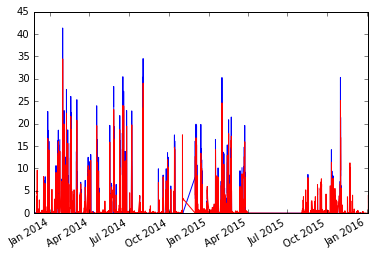

In [84]:
model.df.feat_yield.plot()
(model.df.yield_pred).plot(color='r')

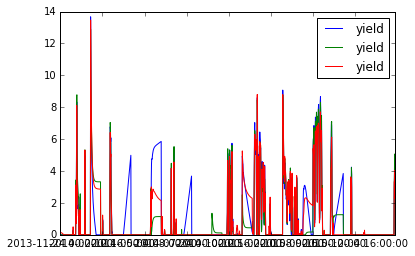

In [112]:
ax = plt.subplot(111)
a ='/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_3/AR_1_MA_0_D_0/submissions_20160420_150719.csv'
a1 = '/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_3/AR_1_MA_0_D_0/submissions_20160420_151431.csv'
a2 = '/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_3/AR_1_MA_0_D_0/submissions_20160420_152309.csv'
pd.read_csv(a,index_col=0).plot(ax=ax)
pd.read_csv(a1,index_col=0).plot(ax=ax)
pd.read_csv(a2,index_col=0).plot(ax=ax)

In [42]:
mod = sm.tsa.SARIMAX(model.df.feat_yield,exog=model.df[model.regressors],order=(1,0,0))
res = mod.fit()

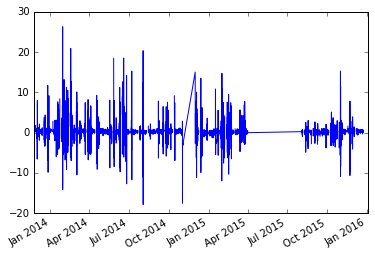

In [58]:
#model.df.feat_yield.plot()
(model.df.feat_yield-res.fittedvalues).plot()

In [61]:
model.df.copy()

,feat_yield,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,gusts_ms,humidity,leafwet450_min,...,aga_DD,aga_Ff,aga_ff10,aga_WW,aga_W'W',aga_c,aga_VV,aga_Td,group,yield_pred
2013-11-23 16:00:00,0,-0.549137,-0.393277,-1.015748,-0.001650,-0.713014,-0.477720,NaN,NaN,NaN,...,Wind blowing from the west-southwest,5,NaN,NaN,NaN,NaN,10.0 and more,14,group0,0.000000
2013-11-23 18:00:00,0,-0.549137,-0.393277,-1.015748,-0.001650,-0.713014,-0.477720,NaN,NaN,NaN,...,Wind blowing from the south-west,4,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-23 20:00:00,0,-0.549137,-0.393277,-1.015748,-0.001650,-0.713014,-0.477720,NaN,NaN,NaN,...,Wind blowing from the west-southwest,4,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-23 22:00:00,0,-0.549137,-0.393277,-1.015748,-0.001650,-0.713014,-0.477720,NaN,NaN,NaN,...,Wind blowing from the south-west,2,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 00:00:00,NaN,-0.549137,-0.393277,-1.015748,-0.001650,-0.713014,-0.477720,NaN,NaN,NaN,...,"Calm, no wind",0,NaN,NaN,NaN,NaN,10.0 and more,13,group0,0.000000
2013-11-24 02:00:00,NaN,-0.549137,-0.393277,-1.015748,-0.001650,-0.713014,-0.477720,NaN,NaN,NaN,...,"Calm, no wind",0,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 04:00:00,NaN,-0.549137,-0.393277,-1.015748,-0.001650,-0.713014,-0.477720,NaN,NaN,NaN,...,"Calm, no wind",0,NaN,NaN,NaN,NaN,10.0 and more,13,group0,0.000000
2013-11-24 06:00:00,NaN,-0.549137,-0.393277,-1.015748,-0.001650,-0.713014,-0.477720,NaN,NaN,NaN,...,"Calm, no wind",0,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 08:00:00,NaN,-0.549137,-0.393277,-1.015748,-0.001650,-0.713014,-0.477720,NaN,NaN,NaN,...,Wind blowing from the south-west,3,NaN,NaN,NaN,NaN,10.0 and more,15,group0,0.000000
2013-11-24 10:00:00,NaN,-0.549137,-0.393277,-1.015748,-0.001650,-0.713014,-0.477720,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Broken clouds (60-90%) 480 m,10.0 and more,NaN,group0,0.000000
